# Métodos numéricos

Cuando trabajamos con métodos numéricos en la resolución de ecuaciones diferenciales, el objetivo es encontrar un conjunto de valores que se aproximen una solución particular de la ecuación diferencial propuesta.

Existen diferentes algoritmos que permiten implementar estos métodos numéricos, algunos más certeros que otros, y por tanto es posible (en ocasiones) estimar el error y decidir qué método emplear en cada etapa de la busqueda de una buena aproximación de la solución.

## Método de Euler

Se utiliza para encontrar una aproximación de la solución al problema de valor inicial

$$ y'=f(x,y) \quad ; \quad y(x_0)=y_0 $$

el algoritmo asociado al método de Euler es:

Para $i=0,1, ... , n-1$ realizar <br>
*    $ x_i = x_0+ih $ <br>
*    $y_{i+1}= y_i +h f(x_i , y_i) $ <br>
Fin

Para trabajar con este método definimos una nueva función en `Python`, llamada `Euler`, que permita encontrar una aproximación para $y(x_n)$ utilizando dicho método.


### Funciones en `Python`
Una función en `Python` es un bloque de código reutilizable que realiza una acción específica, de manera general, una función se define siguiendo la estructura mostrada a continuación:

`def nombre_fun(arg1, arg2, ...., argn):
    #cuerpo de la función
    #
    #
    #
    return val1, val2, ..., valn`

En nuestro caso utilizamos un nombre qué indiqué el método que usaremos (`Euler`) y establecemos que los datos de entrada serán $f(x,y), x_0, x_n, y_0, n$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def Euler(f,x0,xn,y0,n): #nuestra función se llama Euler y sus datos de entrada son f,x0,xn,y0,n
    X = np.linspace(x0,xn,n+1)         
    Y = np.linspace(x0,xn,n+1)                 
    Y[0] = y0
    h=(xn-x0)/n
    for i in range(n):
        Y[i+1] = Y[i] + h*f(X[i],Y[i])
    return Y

Una vez que hemos definido la función  `Euler`, podemos abordar el siguiente ejemplo:

### Ejemplo 01

Considere el siguiente PVI, visto en clases:

$$ y'=y \quad ; \quad y(0)=1.$$

- a) Encuentre su solución.
- b) Use dicha solución, para encontrar una aproximación de $e$.

#### Solución:

- a) Buscamos su solución usando Python:


In [2]:
#declaramos la ecuación.
import numpy as np
import sympy as sp
from sympy import *
sp.init_printing(use_latex='mathjax') 
# Resolviendo ecuación diferencial
# defino las incognitas
x = sp.Symbol('x', real=True)
y = sp.Function('y')

# expreso la ecuacion
f = y(x)
sp.Eq(y(x).diff(x), f)

d              
──(y(x)) = y(x)
dx             

In [3]:
#ahora resolvemos el PVI:
sp.dsolve(y(x).diff(x) - f, ics={y(0):1})

        x
y(x) = ℯ 

La solución de la ecuación diferencial es $y(x)=e^x$.

- b) Para encontrar una eproximación de $e$, basta considerar $x=1$ y tendremos:

$y(1)=e$.
Así, entonces usaremos el método de Euler para encontrar una aproximación, usando la función solución del PVI:

In [4]:
#definimos la función que queremos resolver

def f(x,y): return y #primero definimos la función

#f,x0,xn,y0,n

Euler(f, 0,1,1,100) #llamamos a la función que aplica el método.

array([1.        , 1.01      , 1.0201    , 1.030301  , 1.04060401,
       1.05101005, 1.06152015, 1.07213535, 1.08285671, 1.09368527,
       1.10462213, 1.11566835, 1.12682503, 1.13809328, 1.14947421,
       1.16096896, 1.17257864, 1.18430443, 1.19614748, 1.20810895,
       1.22019004, 1.23239194, 1.24471586, 1.25716302, 1.26973465,
       1.282432  , 1.29525631, 1.30820888, 1.32129097, 1.33450388,
       1.34784892, 1.3613274 , 1.37494068, 1.38869009, 1.40257699,
       1.41660276, 1.43076878, 1.44507647, 1.45952724, 1.47412251,
       1.48886373, 1.50375237, 1.51878989, 1.53397779, 1.54931757,
       1.56481075, 1.58045885, 1.59626344, 1.61222608, 1.62834834,
       1.64463182, 1.66107814, 1.67768892, 1.69446581, 1.71141047,
       1.72852457, 1.74580982, 1.76326792, 1.7809006 , 1.7987096 ,
       1.8166967 , 1.83486367, 1.8532123 , 1.87174443, 1.89046187,
       1.90936649, 1.92846015, 1.94774475, 1.9672222 , 1.98689442,
       2.00676337, 2.026831  , 2.04709931, 2.06757031, 2.08824

Lo que hemos obtenido es una aproximación, dada por:

$$y(1)\approx 2.70481383.$$

Podemos calcular el error obtenido en la aproximación, 

In [5]:
e_e=np.abs(np.exp(1)-Euler(f, 0,1,1,100)[-1])/np.exp(1)*100 #error_euler
e_e

# e = | Valorreal - aprox|
# Er = e / |valorreal| -> e% = Er * 100
#

0.4954599959620114

Lo que corresponde a un error cercano al $0.495459995962011 \%$.


## Método de Runge Kutta de orden 4 (RK4)


Para el problema 
$$ y'=f(x,y) \quad ; \quad y(x_0)=y_0 $$

el algoritmo asociado al método RK4 está dado por:
    
Para $i=0,1, ... , n-1$ realizar <br>

*    $ x_i = x_0+ih $ <br>

*    $ K_1 = f(x_i,y_i) $ <br>

*    $ K_2 = f\left( x_i + \dfrac{h}{2} , y_i + \dfrac{h}{2} K_1 \right) $ <br>

*    $ K_3 = f\left( x_i + \dfrac{h}{2} , y_i + \dfrac{h}{2} K_2 \right) $ <br>

*    $ K_4 = f\left( x_i + h , y_i + h K_3 \right) $ <br>

*    $y_{i+1} = y_i + \dfrac{h}{6} \left[ K_1 + 2K_2 + 2K_3 + K_4 \right] $ <br>

Fin

Para trabajar con este método definimos una nueva función en `Python`, llamada `RK4`, que permita encontrar una aproximación para $y(x_n)$ utilizando dicho método. Establecemos que los datos de entrada serán $f(x,y), x_0, x_n, y_0, n$

In [6]:
def RK4(f, x0, xn, y0, n):
    X = np.linspace(x0,xn,n+1)
    Y = np.linspace(x0,xn,n+1)                 
    Y[0] = y0        
    h = (xn-x0)/n     
    for i in range(n):
        K1=f(X[i],Y[i]) 
        K2=f(X[i]+h/2,Y[i]+(h/2)*K1) 
        K3=f(X[i]+h/2,Y[i]+(h/2)*K2) 
        K4=f(X[i]+h,Y[i]+h*K3)
        Y[i+1] = Y[i] +(h/6)*(K1+2*K2+2*K3+K4)        
    return Y

Una vez que hemos definido la función  `RK4`, podemos abordar el mismo ejemplo anterior (visto en clases), pero ahora usamos el método RK4.

### Ejemplo 02

Dado el PVI:

$$ y'=y \quad ; \quad y(0)=1.$$

Use su solución para encontrar una aproximación de $e$.

#### Solución:

Anteriormente ya hemos definido la función, por tanto llamamos directamente al método:

In [7]:
RK4(f, 0, 1, 1, 100)

array([1.        , 1.01005017, 1.02020134, 1.03045453, 1.04081077,
       1.0512711 , 1.06183655, 1.07250818, 1.08328707, 1.09417428,
       1.10517092, 1.11627807, 1.12749685, 1.13882838, 1.1502738 ,
       1.16183424, 1.17351087, 1.18530485, 1.19721736, 1.2092496 ,
       1.22140276, 1.23367806, 1.24607673, 1.25860001, 1.27124915,
       1.28402542, 1.29693009, 1.30996445, 1.32312981, 1.33642749,
       1.34985881, 1.36342511, 1.37712776, 1.39096813, 1.40494759,
       1.41906755, 1.43332941, 1.44773461, 1.46228459, 1.47698079,
       1.4918247 , 1.50681779, 1.52196156, 1.53725752, 1.55270722,
       1.56831219, 1.58407398, 1.59999419, 1.6160744 , 1.63231622,
       1.64872127, 1.66529119, 1.68202765, 1.69893231, 1.71600686,
       1.73325302, 1.7506725 , 1.76826705, 1.78603843, 1.80398842,
       1.8221188 , 1.8404314 , 1.85892804, 1.87761058, 1.89648088,
       1.91554083, 1.93479233, 1.95423732, 1.97387773, 1.99371553,
       2.01375271, 2.03399126, 2.05443321, 2.07508061, 2.09593

y calculamos su error:

In [8]:
e_rk4=np.abs(np.exp(1)-RK4(f, 0,1,1,100)[-1])/np.exp(1)*100 #error_rk4
e_rk4

8.264087710963014e-09

Si queremos que el resultado se muestre con más valores después de la coma, hacemos:

In [9]:
print('El error mediante el método RK4 es: {:,.20f}'.format(e_rk4)+ "%")

El error mediante el método RK4 es: 0.00000000826408771096%


Claramente, notamos que el método RK4 nos entrega una mejor aproximación pues:

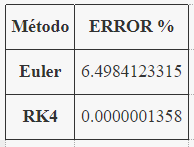

## Ejercicios

### Ejercicio 01

Considere el problema de valores iniciales:

$$ y'=\dfrac{y}{x}+x\mathrm{e}^{-\frac{y}{x}} \quad ; \quad y(1)=2.$$

* a) Utilice el método de Euler para encontrar una aproximación de $y(11)$ donde $h=1$.
* b) Usando Python resuelva la ecuación y determine si es una buena aproximación (haga un análisis del error obtenido).

In [10]:
def f(x,y): return y/x + x*np.exp(-y/x)

n = (11-1)/1
n

#f,x0,xn,y0,n
Euler(f, 1,11,2,10)



array([ 2.        ,  4.13533528,  6.4559638 ,  8.9567102 , 11.62207214,
       14.43569017, 17.38271812, 20.45026675, 23.62729081, 26.90433723,
       30.273286  ])

### Ejercicio 02

Considere el siguiente PVI:

$$ y' = 0,2xy \quad ; \quad y(0) = 1.$$

* a) Utilice el método RK4 para encontrar una aproximación de $y(4)$ donde $h=1$.
* b) Usando Python resuelva la ecuación y determine si es una buena aproximación (haga un análisis del error obtenido).

In [11]:
def f(x,y): return 0.2*x*y

n = (4-0)/1
n

#f,x0,xn,y0,n
RK4(f, 0, 1, 1, 4)


array([1.        , 1.00626957, 1.02531512, 1.05786211, 1.10517091])

### Ejercicio 03: 

La ecuación
$$\frac{dP}{dt}=kP\left(1-\frac{P}{N} \right)-a$$
representa unn modelo logístico de crecimiento poblacional con cosecha constante.

Para una cierta variedad de pez comestible, se considera $a=0.5$, $k=3$ y $N=10$, donde $N$ y $P(t)$ están medidas en miles.

Suponga que en el instante $t=0$ (medido en días) la población inicial de peces es $2600$.

* a) Use el método RK4 para estimar la población de peces al cabo de una semana.

* b) Estime la cantidad de peces diarios al cabo de un año completo. ¿La población de peces se estabiliza después de cierto tiempo? ¿Qué se espera de $P(t)$ si $t \to \infty$?

* c) La EDO resultante es autónoma. Utilice técnicas cualitativas para corroborar los resultados anteriores.

* d) Resuelva la EDO vía separación de variables, luego calcule la población al cabo de un año. Compruebe si sus resultados coinciden con los obtenidos anteriormente.

In [12]:
#Y/X

def f(x,y): return 3*y*(1-y/10000) - 0.5

#n = (4-0)/1
#n

#f,x0,xn,y0,n
RK4(f, 0, 1, 2600, 4)








array([2600.        , 4264.65904643, 6114.79428542, 7690.80969417,
       8756.55379971])